In [1]:
#using Revise
addprocs(4)
using LightDarkPOMDPs, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = LightDark2D()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

2-element StaticArrays.SArray{Tuple{2},Float64,1,2}:
 2.0
 2.0

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [2.0, 2.0]            
 [0.930242, 1.45681]   
 [0.355183, 0.354234]  
 [0.180636, 0.846597]  
 [-0.0995147, 0.86318] 
 [-0.328423, 0.534377] 
 [-0.398573, 0.228607] 
 [-0.042408, 0.0600126]
 [-0.764753, 0.308273] 
 [-0.627397, 0.320383] 
 [-0.521, -0.526074]   

In [6]:
h.action_hist

10-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [-1.06976, -0.54319]  
 [-0.575059, -1.10258] 
 [-0.174547, 0.492363] 
 [-0.28015, 0.0165824] 
 [-0.228908, -0.328803]
 [-0.0701498, -0.30577]
 [0.356164, -0.168595] 
 [-0.722345, 0.24826]  
 [0.137356, 0.0121104] 
 [0.106397, -0.846458] 

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -4.71972 
 -2.267   
 -0.262262
 -0.414058
 -0.457746
 -0.245918
 -0.183199
 -0.294408
 -0.349446
 -0.612041

In [8]:
## Study

In [9]:
study = RewardvsN(LightDark2D)

CMDPs.RewardvsN
  mdp: LightDarkPOMDPs.LightDark2D
  bandits: Array{DataType}((1,))
  n_seeds: Int64 200
  n_iters: Array{Int64}((7,)) [50, 100, 200, 500, 1000, 1500, 2000]
  max_steps: Int64 10


In [10]:
result = run_study(study)

CMDPs.RewardvsNResult("LightDark2D", 1400×4 DataFrames.DataFrame
│ Row  │ alg            │ seed │ n_iters │ r_total  │
├──────┼────────────────┼──────┼─────────┼──────────┤
│ 1    │ MCTS.DPWBandit │ 1    │ 50      │ -19.346  │
│ 2    │ MCTS.DPWBandit │ 2    │ 50      │ -16.777  │
│ 3    │ MCTS.DPWBandit │ 3    │ 50      │ -16.1259 │
│ 4    │ MCTS.DPWBandit │ 4    │ 50      │ -13.0041 │
│ 5    │ MCTS.DPWBandit │ 5    │ 50      │ -11.6414 │
│ 6    │ MCTS.DPWBandit │ 6    │ 50      │ -8.96875 │
│ 7    │ MCTS.DPWBandit │ 7    │ 50      │ -11.6134 │
│ 8    │ MCTS.DPWBandit │ 8    │ 50      │ -27.1207 │
│ 9    │ MCTS.DPWBandit │ 9    │ 50      │ -15.2374 │
│ 10   │ MCTS.DPWBandit │ 10   │ 50      │ -17.0713 │
│ 11   │ MCTS.DPWBandit │ 11   │ 50      │ -12.4311 │
⋮
│ 1389 │ MCTS.DPWBandit │ 189  │ 2000    │ -8.17972 │
│ 1390 │ MCTS.DPWBandit │ 190  │ 2000    │ -7.77429 │
│ 1391 │ MCTS.DPWBandit │ 191  │ 2000    │ -7.66223 │
│ 1392 │ MCTS.DPWBandit │ 192  │ 2000    │ -8.50084 │
│ 1393 │ MCTS.D

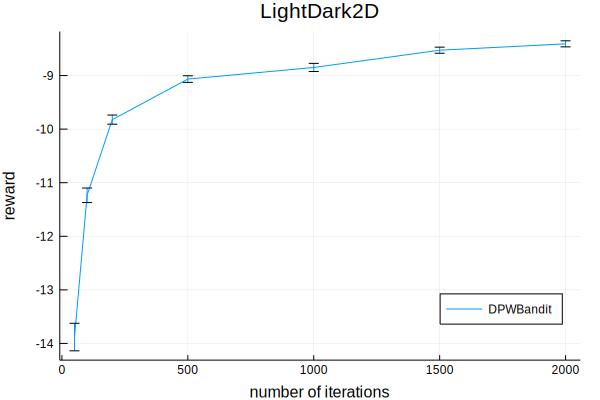

In [11]:
plot(result)